# Email Spam Detection

# Importing Libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Reading the dataset

In [53]:
data = pd.read_csv('spam.csv', encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Preprocessing 1

In [54]:
data.shape

(5572, 5)

In [55]:
type(data)

pandas.core.frame.DataFrame

In [56]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
data.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [58]:
data.iat[4,1]

"Nah I don't think he goes to usf, he lives around here though"

In [59]:
data.at[4,'v2']

"Nah I don't think he goes to usf, he lives around here though"

In [60]:
data.iloc[0:10, 0:2]

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [61]:
type(data.index)

pandas.core.indexes.range.RangeIndex

In [62]:
data['Category'] = data['v1'].apply(lambda x : 1 if x == 'spam' else 0)
data.head()

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [63]:
data.rename(columns = {'v2':'Message'}, inplace = True)
data.head()

,v1,Message,Category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [64]:
data.Category.value_counts()

0    4825
1     747
Name: Category, dtype: int64

In [65]:
amount_of_spam = data.Category.value_counts()[1]
amount_of_spam

747

In [66]:
amount_of_ham = data.Category.value_counts()[0]
amount_of_ham

4825

# Data Visualizing

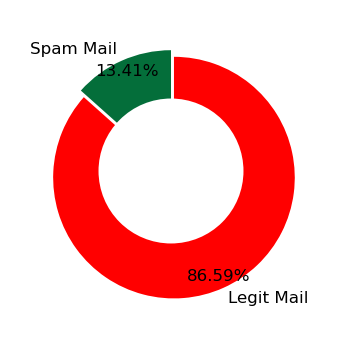

In [67]:
Category_names = ['Spam Mail', 'Legit Mail']
custom_colours = ['#046E3A', 'red']
sizes = [amount_of_spam, amount_of_ham]
plt.figure(figsize = (2,2), dpi = 200)
plt.pie(sizes, labels = Category_names, textprops = {'fontsize' : 6}, startangle = 90, colors = custom_colours, autopct = '%.2f%%', pctdistance = 0.9, explode = [0, 0.06])
center_circle = plt.Circle((0,0), radius = .6, fc = 'white')
plt.gca().add_artist(center_circle)
plt.show()

In [68]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\MY-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\MY-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [70]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Data Preprocessing 2

In [72]:
from bs4 import BeautifulSoup

In [75]:
def clean_msg_no_html(message, stemmer = PorterStemmer(), stop_words = stopwords):
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    for word in words:
        if word not in stop_words and word.isalpha():
            stemmed_word = stemmer.stem(word)
            filtered_words.append(stemmed_word)
    return filtered_words

In [76]:
clean_msg_no_html('How are you doing?....nice to meet you....I am working in big company')

['nice', 'meet', 'work', 'big', 'compani']

In [77]:
data1 = data['Message'].apply(clean_msg_no_html)
data1

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, pound, prize, claim, e...
5568                          [b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: Message, Length: 5572, dtype: object

In [78]:
len(data1)

5572

In [80]:
data1_list = []
for sublist in data1:
    for item in sublist:
        data1_list.append(item)

In [81]:
len(data1_list)

45912

In [82]:
data1_list[:10]

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la']

In [83]:
unique_words = pd.Series(data1_list).value_counts()
type(unique_words)

pandas.core.series.Series

In [84]:
unique_words

u           1120
call         656
go           451
get          445
ur           381
            ... 
pei            1
subtoitl       1
jot            1
cereal         1
piti           1
Length: 5865, dtype: int64

In [87]:
x_train, x_test, y_train, y_test = train_test_split(data.Message, data.Category, test_size = 0.3, random_state = 42)

In [92]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3900,)
(1672,)
(3900,)
(1672,)


In [93]:
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
vectorizer = CountVectorizer(stop_words = 'english')

In [96]:
my_vector = vectorizer.fit_transform(data.Message)

In [97]:
my_vector.shape

(5572, 8404)

In [98]:
x_train, x_test, y_train, y_test = train_test_split(my_vector, data.Category, test_size = 0.3, random_state = 42)

In [106]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3900, 8404)
(1672, 8404)
(3900,)
(1672,)


# Model Building

In [99]:
from sklearn.naive_bayes import MultinomialNB

In [100]:
classifier = MultinomialNB()

In [101]:
classifier.fit(x_train, y_train)

MultinomialNB()

In [103]:
nr_correct = (y_test == classifier.predict(x_test)).sum()
nr_correct

1634

In [104]:
nr_incorrect = (y_test != classifier.predict(x_test)).sum()
nr_incorrect

38

In [105]:
nr_correct/x_test.shape[0]

0.9772727272727273

In [107]:
nr_incorrect/x_test.shape[0]

0.022727272727272728

# Model Evaluation

In [108]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [109]:
recall_score(y_test, classifier.predict(x_test))

0.9223744292237442

In [110]:
precision_score(y_test, classifier.predict(x_test))

0.905829596412556

In [111]:
f1_score(y_test, classifier.predict(x_test))

0.9140271493212669

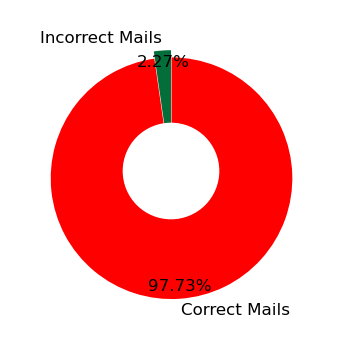

In [117]:
Category_names = ['Incorrect Mails', 'Correct Mails']
custom_colours = ['#046E3A', 'red']
sizes = [nr_incorrect, nr_correct]
plt.figure(figsize = (2,2), dpi = 200)
plt.pie(sizes, labels = Category_names, textprops = {'fontsize' : 6}, startangle = 90, colors = custom_colours, autopct = '%.2f%%', pctdistance = 0.9, explode = [0, 0.06])
center_circle = plt.Circle((0,0), radius = .4, fc = 'white')
plt.gca().add_artist(center_circle)
plt.show()